In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
from scipy.integrate import quad
from scipy import integrate
from math import pi, sqrt, exp
import matplotlib.pyplot as plt

The following dataset comes from [here](https://michaelschomaker.github.io/pdf/Preprint_Collider_Schomaker_2018.pdf)

In [21]:
# Defining the dataset

def generate_data(n=10000, seed=0, beta1=1.05, alpha1=0.4, alpha2=0.3):
    np.random.seed(seed)
    age = np.random.normal(65, 5, n)
    sodium = age / 18 + np.random.normal(size=n)
    blood_pressure = beta1 * sodium + 2 * age + np.random.normal(size=n)
    proteinuria = alpha1 * sodium + alpha2 * blood_pressure + np.random.normal(size=n)
    return pd.DataFrame({'blood_pressure': blood_pressure, 'sodium': sodium,
                         'age': age, 'proteinuria': proteinuria})

Data = generate_data(n=10000, seed=0, beta1=1.05, alpha1=0.4, alpha2=0.3)
Data.head()

,blood_pressure,sodium,age,proteinuria
0,152.064528,3.899009,73.820262,47.550194
1,137.034579,2.889035,67.000786,42.570771
2,146.502908,5.616583,69.893690,46.701630
3,157.482588,4.424230,76.204466,49.149768
4,150.321303,3.952067,74.337790,47.330976


In [22]:
# Implementing a linear regression to write "blood_pressure" as a linear combination of "sodium" and "age".

X = np.array(Data[['sodium', 'age']]).reshape(-1, 2)
Y = np.array(Data['blood_pressure']).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
poly_2 = PolynomialFeatures(degree = 1)
X_train_poly_2 = poly_2.fit_transform(X_train)
poly_2.fit(X_train_poly_2, Y_train)
lin2 = LinearRegression()
lin2.fit(X_train_poly_2, Y_train)
coeff = lin2.coef_[0]

In [23]:
# Calculating the accuracy of the linear regression implemented above by three criteria.

expected_Y  = Y_test
predicted_poly_2_Y = lin2.predict(poly_2.fit_transform(X_test))
print("The accuracy of the model by using 'metrics.r2_score' is: ",metrics.r2_score(expected_Y, predicted_poly_2_Y))
print("The accuracy of the model by using 'mean_squared_error' is: ",mean_squared_error(expected_Y, predicted_poly_2_Y))
arr = np.zeros_like(expected_Y)
print("The relative error of the model is: ",mean_squared_error(expected_Y, predicted_poly_2_Y)/mean_squared_error(expected_Y, arr))

The accuracy of the model by using 'metrics.r2_score' is:  0.9904802486118278
The accuracy of the model by using 'mean_squared_error' is:  0.9904103576578622
The relative error of the model is:  5.5063708976567054e-05


In [24]:
# Calculating the joint probability density function of "sodium" and "age".
mean_sodium_age = Data[['sodium', 'age']].mean().to_numpy()
cov_sodium_age = Data[['sodium', 'age']].cov().to_numpy()
distribution_sodium_age = multivariate_normal(mean = mean_sodium_age, cov = cov_sodium_age)
def Density_sodium_and_age(sodium,age):
  return  distribution_sodium_age.pdf(np.dstack((sodium, age)))

# Calculating the probability density function of "sodium".
mean_sodium = Data[['sodium']].mean().to_numpy()[0]
cov_sodium = Data[['sodium']].cov().to_numpy()[0][0]
def Density_sodium(sodium):
  return  (1/sqrt(2*pi*cov_sodium))*exp(-(1/(2*cov_sodium))*((sodium-mean_sodium)**2))

# Calculating the probability density function of "age".
mean_age = Data[['age']].mean().to_numpy()[0]
cov_age = Data[['age']].cov().to_numpy()[0][0]
def Density_age(age):
  return  (1/sqrt(2*pi*cov_age))*exp(-(1/(2*cov_age))*((age-mean_age)**2))

# Calculating the conditional probability density function of "sodium" given "age".
def Density_sodium_given_age(sodium,age):
  return Density_sodium_and_age(sodium,age)/Density_age(age)

# Calculating the conditional probability density function of "age" given "sodium".
def Density_age_given_sodium(age,sodium):
  return Density_sodium_and_age(sodium,age)/Density_sodium(sodium)

Let $S$, $A$ and $B$ stand for the sodium intake, the age, and the blood preasure, respectively. Also, let $B=g(S,A)=\alpha S+\beta A$. Then, we have that
\begin{equation}
\mathbb{P}\mathbb{E}\mathbb{A}\mathbb{C}\mathbb{E}_d(S\to B)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\left|\frac{\partial g}{\partial s}(s,a)\right|f(s|a)^{2d}f(a)\,\mathrm{d}s\mathrm{d}a=|\alpha|\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(s|a)^{2d}f(a)\,\mathrm{d}s\mathrm{d}a
\end{equation}
Similarly, we have that
\begin{equation}
\mathbb{P}\mathbb{E}\mathbb{A}\mathbb{C}\mathbb{E}_d(A\to B)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\left|\frac{\partial g}{\partial a}(s,a)\right|f(a|s)^{2d}f(s)\,\mathrm{d}s\mathrm{d}a=|\beta|\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(a|s)^{2d}f(s)\,\mathrm{d}s\mathrm{d}a
\end{equation}
Also,
\begin{equation}
\mathbb{P}\mathbb{E}\mathbb{A}\mathbb{C}\mathbb{E}_d((S,A)\to B)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\left|\nabla g(s,a)\right|f(s,a)^{2d}\,\mathrm{d}s\mathrm{d}a=\sqrt{\alpha^2+\beta^2}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(s,a)^{2d}\,\mathrm{d}s\mathrm{d}a
\end{equation}

In [25]:
#Calculating the intervals for which 99.7% of the random observations of "sodium" and "age" fall within.
bound_low_sodium = mean_sodium_age[0]- 3*sqrt(cov_sodium_age[0][0])
bound_up_sodium = mean_sodium_age[0]+ 3*sqrt(cov_sodium_age[0][0])
bound_low_age = mean_sodium_age[1]- 3*sqrt(cov_sodium_age[1][1])
bound_up_age = mean_sodium_age[1]+ 3*sqrt(cov_sodium_age[1][1])

# Calculating the PEACE of degree d of "sodium" on "blood preasure".
def PEACE_sodium_to_blood_pressure(d):
  def integrand(sodium,age):
    return abs(coeff[1])*(4**d)*(Density_sodium_given_age(sodium,age)**(2*d))*(Density_age(age))
  return integrate.nquad(integrand,[(bound_low_sodium,bound_up_sodium),(bound_low_age,bound_up_age)])[0]

# Calculating the PEACE of degree d of "age" on "blood preasure".
def PEACE_age_to_blood_pressure(d):
  def integrand(sodium,age):
    return abs(coeff[2])*(4**d)*(Density_age_given_sodium(age,sodium)**(2*d))*(Density_sodium(sodium))
  return integrate.nquad(integrand,[(bound_low_sodium,bound_up_sodium),(bound_low_age,bound_up_age)])[0]


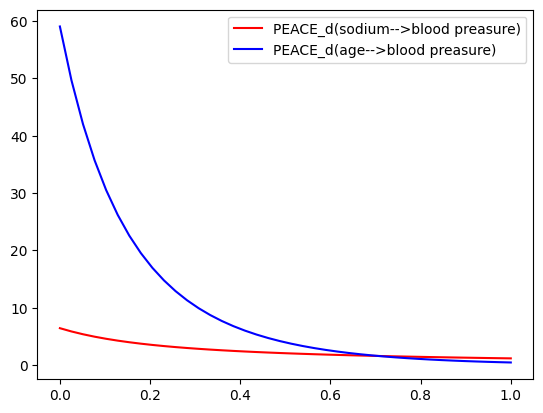

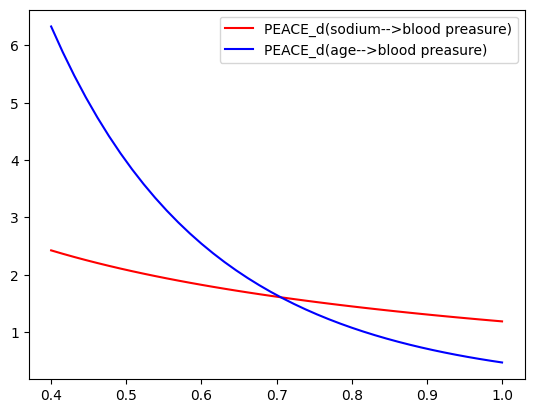

In [26]:
# Plotting separately the PEACEs of degree d of "sodium" and "age" on "blood preasure".

PEACE_vectoized_sodium_to_blood_pressure = np.vectorize(PEACE_sodium_to_blood_pressure)
PEACE_vectoized_age_to_blood_pressure = np.vectorize(PEACE_age_to_blood_pressure)
x = np.linspace(0, 1, 40)
x_2 = np.linspace(0.4, 1, 40)
y = PEACE_vectoized_sodium_to_blood_pressure(x)
yy = PEACE_vectoized_sodium_to_blood_pressure(x_2)
y_2 = PEACE_vectoized_age_to_blood_pressure(x)
yy_2 = PEACE_vectoized_age_to_blood_pressure(x_2)
plt.plot(x, y, 'red', label='PEACE_d(sodium-->blood preasure)')
plt.plot(x, y_2, 'blue', label='PEACE_d(age-->blood preasure)')
plt.legend()
plt.show()
plt.plot(x_2, yy, 'red', label='PEACE_d(sodium-->blood preasure)')
plt.plot(x_2, yy_2, 'blue', label='PEACE_d(age-->blood preasure)')
plt.legend()
plt.show()

Let $S$, $A$ and $B$ stand for the sodium intake, the age, and the blood preasure, respectively. Also, let $B=g(S,A)=\alpha S+\beta A$. Then, we have that
\begin{equation}
\mathbb{P}\mathbb{E}\mathbb{A}\mathbb{C}\mathbb{E}_d^{(r)}(S\to B)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\left|\frac{\partial g}{\partial s}(s,a)\right|f(s|a)^{2d}f(a)^r\,\mathrm{d}s\mathrm{d}a=|\alpha|\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(s|a)^{2d}f(a)^r\,\mathrm{d}s\mathrm{d}a
\end{equation}
Similarly, we have that
\begin{equation}
\mathbb{P}\mathbb{E}\mathbb{A}\mathbb{C}\mathbb{E}_d^{(r)}(A\to B)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\left|\frac{\partial g}{\partial a}(s,a)\right|f(a|s)^{2d}f(s)^r\,\mathrm{d}s\mathrm{d}a=|\beta|\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(a|s)^{2d}f(s)^r\,\mathrm{d}s\mathrm{d}a
\end{equation}

In [27]:
# Calculating the PEACE^(2d) of degree d of "sodium" on "blood preasure".
def PEACE_sodium_to_blood_pressure_2d(d):
  def integrand(sodium,age):
    return abs(coeff[1])*(4**d)*(Density_sodium_given_age(sodium,age)**(2*d))*(Density_age(age)**(2*d))
  return integrate.nquad(integrand,[(bound_low_sodium,bound_up_sodium),(bound_low_age,bound_up_age)])[0]

# Calculating the PEACE^(2d) of degree d of "age" on "blood preasure".
def PEACE_age_to_blood_pressure_2d(d):
  def integrand(sodium,age):
    return abs(coeff[2])*(4**d)*(Density_age_given_sodium(age,sodium)**(2*d))*(Density_sodium(sodium)**(2*d))
  return integrate.nquad(integrand,[(bound_low_sodium,bound_up_sodium),(bound_low_age,bound_up_age)])[0]

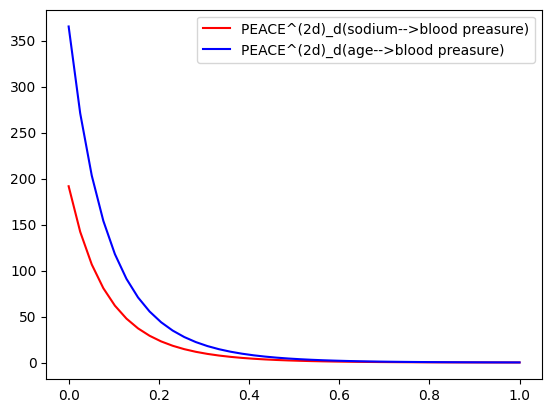

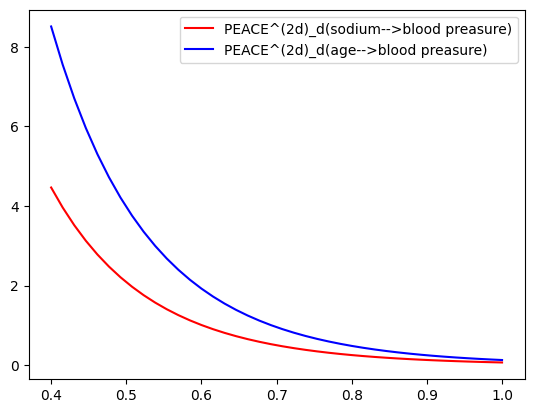

In [28]:
# Plotting separately the PEACE^(2d)s of degree d of "sodium" and "age" on "blood preasure".

PEACE_vectoized_sodium_to_blood_pressure_2d = np.vectorize(PEACE_sodium_to_blood_pressure_2d)
PEACE_vectoized_age_to_blood_pressure_2d = np.vectorize(PEACE_age_to_blood_pressure_2d)
z = PEACE_vectoized_sodium_to_blood_pressure_2d(x)
zz = PEACE_vectoized_sodium_to_blood_pressure_2d(x_2)
z_2 = PEACE_vectoized_age_to_blood_pressure_2d(x)
zz_2 = PEACE_vectoized_age_to_blood_pressure_2d(x_2)
plt.plot(x, z, 'red', label='PEACE^(2d)_d(sodium-->blood preasure)')
plt.plot(x, z_2, 'blue', label='PEACE^(2d)_d(age-->blood preasure)')
plt.legend()
plt.show()
plt.plot(x_2, zz, 'red', label='PEACE^(2d)_d(sodium-->blood preasure)')
plt.plot(x_2, zz_2, 'blue', label='PEACE^(2d)_d(age-->blood preasure)')
plt.legend()
plt.show()

In [29]:
# Calculating the PEACE of degree d of the joint of "sodium" and "age" on "blood preasure".
grad = sqrt((coeff[1]**2)+(coeff[2]**2))
def PEACE_sodium_and_age_to_blood_preasure(d):
  def integrand_2(sodium,age):
    return grad*(4**d)*Density_sodium_and_age(sodium,age)**(2*d)
  return integrate.nquad(integrand_2,[(bound_low_sodium,bound_up_sodium),(bound_low_age,bound_up_age)])[0]

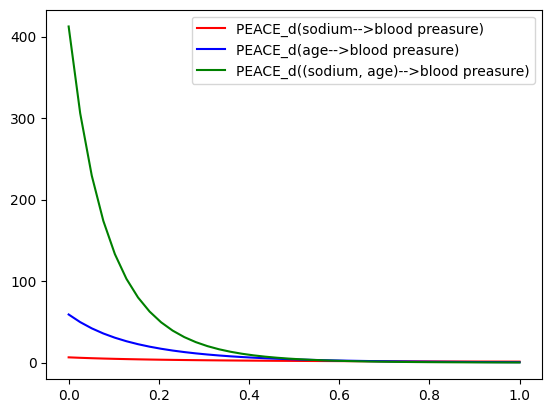

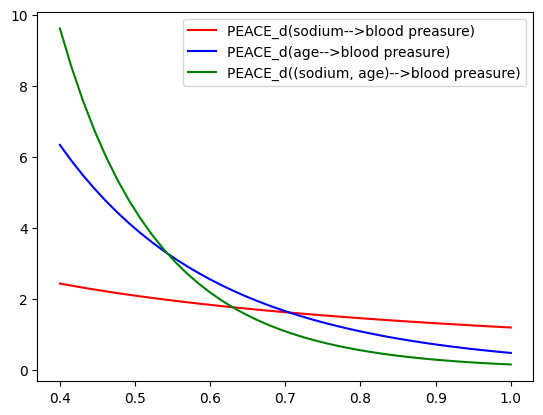

In [30]:
# Plotting separately the PEACEs of degree d of "sodium", "age", and the joint of "sodium" and "age" on "blood preasure".
PEACE_vectorized_sodium_and_age_to_blood_preasure = np.vectorize(PEACE_sodium_and_age_to_blood_preasure)
w = PEACE_vectorized_sodium_and_age_to_blood_preasure(x)
ww = PEACE_vectorized_sodium_and_age_to_blood_preasure(x_2)
plt.plot(x, y,'red', label='PEACE_d(sodium-->blood preasure)')
plt.plot(x, y_2,'blue', label='PEACE_d(age-->blood preasure)')
plt.plot(x, w,'green',label='PEACE_d((sodium, age)-->blood preasure)')
plt.legend()
plt.show()
plt.plot(x_2, yy,'red', label='PEACE_d(sodium-->blood preasure)')
plt.plot(x_2, yy_2,'blue', label='PEACE_d(age-->blood preasure)')
plt.plot(x_2, ww,'green',label='PEACE_d((sodium, age)-->blood preasure)')
plt.legend()
plt.show()

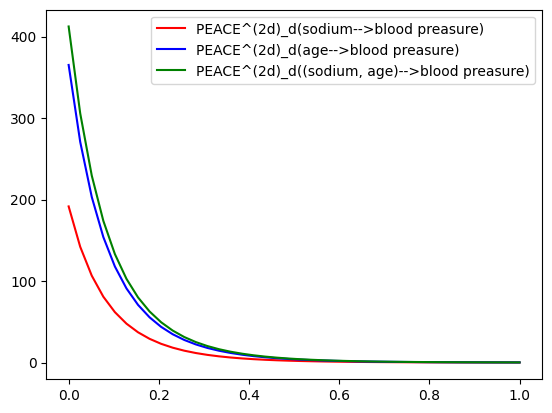

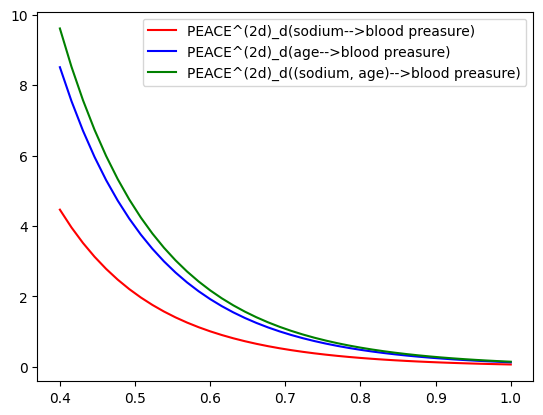

In [31]:
# Plotting separately the PEACE^(2d)s of degree d of "sodium", "age", and the joint of "sodium" and "age" on "blood preasure".
plt.plot(x, z,'red', label='PEACE^(2d)_d(sodium-->blood preasure)')
plt.plot(x, z_2,'blue', label='PEACE^(2d)_d(age-->blood preasure)')
plt.plot(x, w,'green',label='PEACE^(2d)_d((sodium, age)-->blood preasure)')
plt.legend()
plt.show()
plt.plot(x_2, zz,'red', label='PEACE^(2d)_d(sodium-->blood preasure)')
plt.plot(x_2, zz_2,'blue', label='PEACE^(2d)_d(age-->blood preasure)')
plt.plot(x_2, ww,'green',label='PEACE^(2d)_d((sodium, age)-->blood preasure)')
plt.legend()
plt.show()